In [1]:
#import data manipulation libraries
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import logging
import logging
logging.basicConfig(filename='model.log',level=logging.INFO, filemode='w', format='%(asctime)s - %(levelname)s - %(message)s')

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
url1="https://raw.githubusercontent.com/Frisk516/Student_MLModel/refs/heads/main/StudentsPerformance.csv"
url2="https://raw.githubusercontent.com/Frisk516/Student_MLModel/refs/heads/main/StudentPerformanceFactors.csv"
df1=pd.read_csv(url1)
df2=pd.read_csv(url2)
df1.sample(frac=1)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
629,female,group C,some high school,standard,completed,44,51,55
357,female,group C,some college,free/reduced,completed,42,66,69
215,male,group B,some high school,standard,completed,84,83,75
824,female,group C,some high school,free/reduced,none,48,58,52
962,female,group E,associate's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
849,male,group D,associate's degree,standard,none,80,75,69
87,female,group D,associate's degree,standard,none,71,71,74
530,female,group C,associate's degree,standard,completed,68,67,73
658,female,group D,associate's degree,free/reduced,none,43,60,58


In [3]:
df2.sample(frac=1)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
4239,20,90,Medium,Medium,Yes,4,83,High,Yes,1,Low,Low,Public,Positive,3,No,College,Near,Male,69
1539,3,96,High,High,Yes,9,59,Medium,Yes,2,Low,Medium,Public,Negative,3,No,College,Moderate,Female,66
344,17,75,Medium,High,Yes,6,80,Medium,No,1,Low,Medium,Private,Positive,5,No,High School,Moderate,Male,65
4393,17,70,High,Medium,No,8,82,Low,Yes,2,High,High,Public,Negative,2,Yes,High School,Moderate,Female,64
3539,19,70,Medium,Medium,Yes,6,90,Low,Yes,2,Low,Medium,Private,Positive,3,No,High School,Moderate,Male,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,5,87,High,Low,No,6,86,Medium,Yes,2,Medium,High,Public,Positive,3,No,Postgraduate,Near,Female,66
5120,12,80,Medium,Low,No,6,75,Medium,Yes,1,Low,High,Public,Negative,4,No,High School,Moderate,Male,62
2864,22,73,Low,High,Yes,4,92,Medium,Yes,0,Low,Medium,Public,Positive,4,No,Postgraduate,Moderate,Male,67
2207,22,84,High,Medium,Yes,6,89,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,High School,Near,Male,71


In [4]:
#making sure we have a common target column
if {'math_score', 'reading_score', 'writing_score'}.issubset(df1.columns):
    # average the three scores for a general performance measure
    df1['exam_score'] = df1[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
elif {'math score', 'reading score', 'writing score'}.issubset(df1.columns):
    df1['exam_score'] = df1[['math score', 'reading score', 'writing score']].mean(axis=1)
else:
    raise ValueError("Couldn't find exam score columns in StudentsPerformance dataset")

In [5]:
#normalising column names
df1.columns = df1.columns.str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.lower().str.replace(' ', '_')

In [6]:
#combining the two datasets
combined = pd.concat([df1, df2], ignore_index=True, sort=False)
print("Combined dataset shape:", combined.shape)

Combined dataset shape: (7607, 27)


In [7]:
combined


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,exam_score,hours_studied,...,internet_access,tutoring_sessions,family_income,teacher_quality,school_type,peer_influence,physical_activity,learning_disabilities,parental_education_level,distance_from_home
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,72.666667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female,group C,some college,standard,completed,69.0,90.0,88.0,82.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,92.666667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,49.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,male,group C,some college,standard,none,76.0,78.0,75.0,76.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7602,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,25.0,...,Yes,1.0,High,Medium,Public,Positive,2.0,No,High School,Near
7603,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,23.0,...,Yes,3.0,Low,High,Public,Positive,2.0,No,High School,Near
7604,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,20.0,...,Yes,3.0,Low,Medium,Public,Negative,2.0,No,Postgraduate,Near
7605,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,10.0,...,Yes,2.0,Low,Medium,Private,Positive,3.0,No,High School,Far


In [8]:
#separating numerical and categorical columns
numerical = combined.select_dtypes(exclude=['object'])
categorical = combined.select_dtypes(include=['object'])

In [9]:
#performing EDA
from collections import OrderedDict
stats=[]
for i in numerical.columns:
    numerical_stats=OrderedDict({
        'feature':i,
        'mean':numerical[i].mean(),
        'median':numerical[i].median(),
        'mode':numerical[i].mode()[0],
        'std':numerical[i].std(),
        'min':numerical[i].min(),
        'max':numerical[i].max()
    })
    stats.append(numerical_stats)
report=pd.DataFrame(stats)


#checking outliers
outlier_label = []
for col in report['feature']:
    Q1 = combined[col].quantile(0.25)
    Q3 = combined[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = combined[(combined[col] < LW) | (combined[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

report

,feature,mean,median,mode,std,min,max,Outlier Comment
0,math_score,66.089000,66.0,65.0,15.163080,0.0,100.0,Has Outliers
1,reading_score,69.169000,70.0,72.0,14.600192,17.0,100.0,Has Outliers
2,writing_score,68.054000,69.0,74.0,15.195657,10.0,100.0,Has Outliers
3,exam_score,67.305990,67.0,68.0,6.314806,9.0,101.0,Has Outliers
4,hours_studied,19.975329,20.0,20.0,5.990594,1.0,44.0,Has Outliers
5,attendance,79.977448,80.0,67.0,11.547475,60.0,100.0,No Outliers
6,sleep_hours,7.029060,7.0,7.0,1.468120,4.0,10.0,No Outliers
7,previous_scores,75.070531,75.0,66.0,14.399784,50.0,100.0,No Outliers
8,tutoring_sessions,1.493719,1.0,1.0,1.230570,0.0,8.0,Has Outliers
9,physical_activity,2.967610,3.0,3.0,1.031231,0.0,6.0,No Outliers


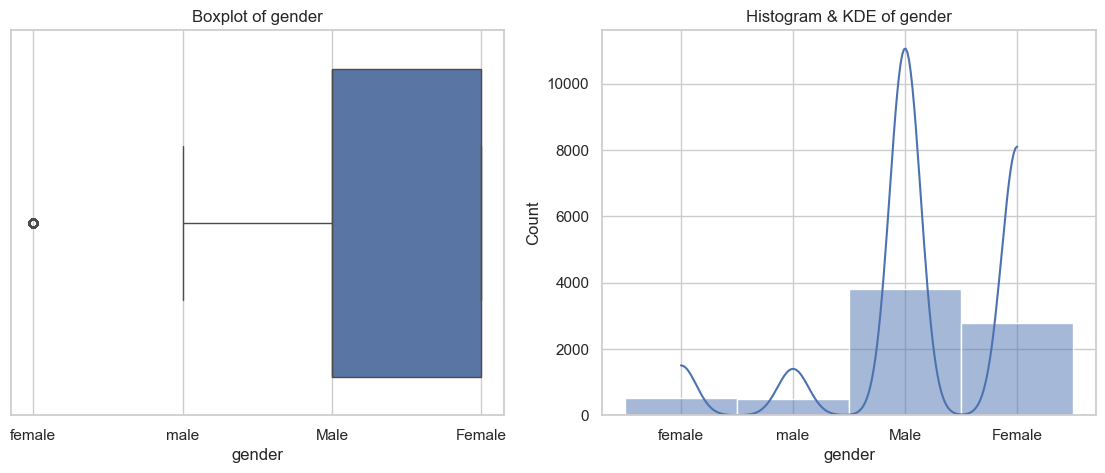

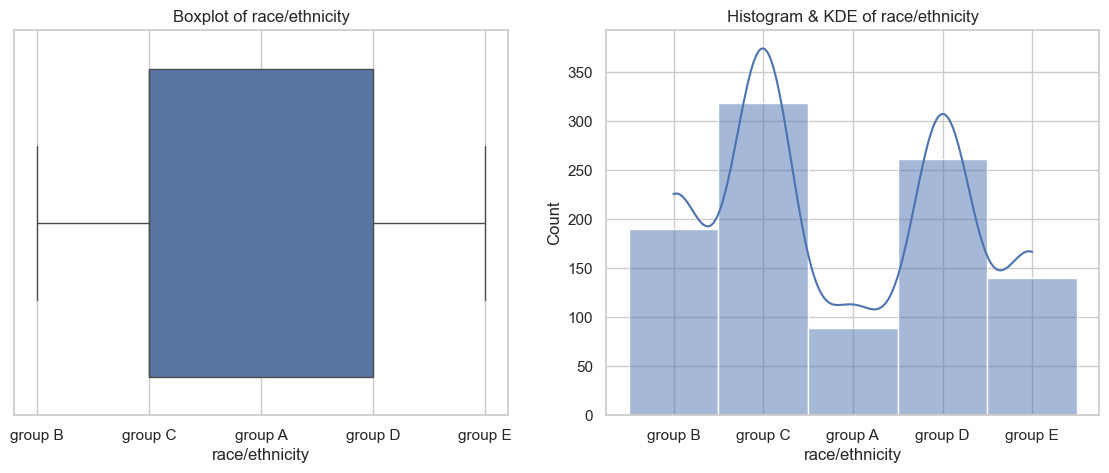

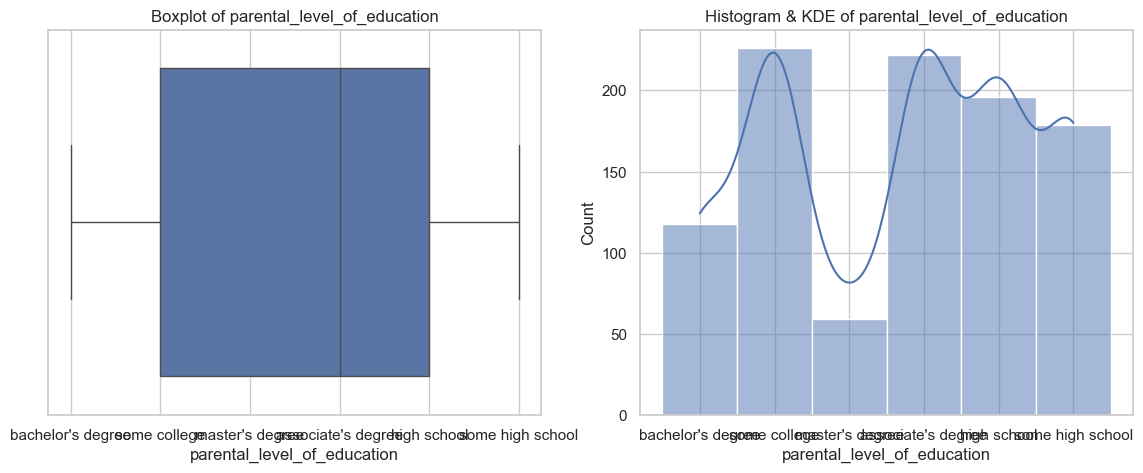

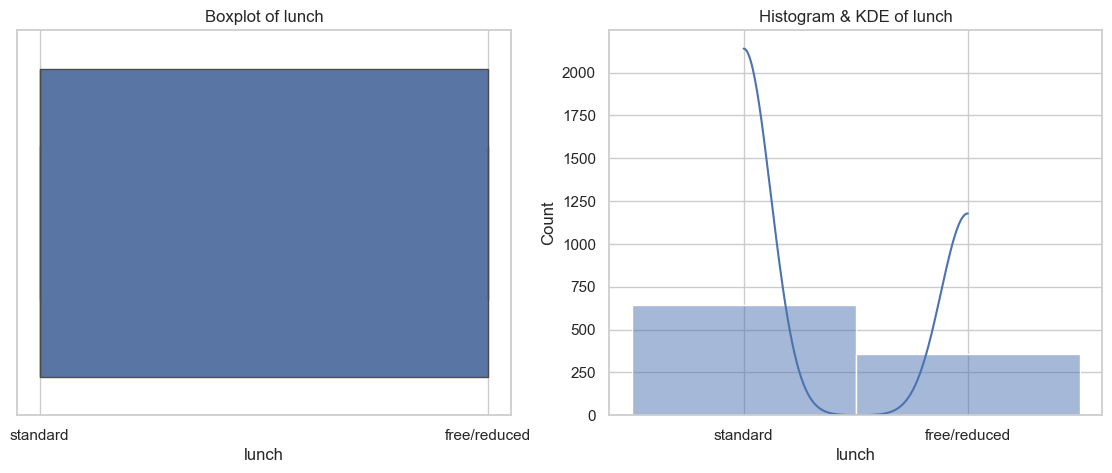

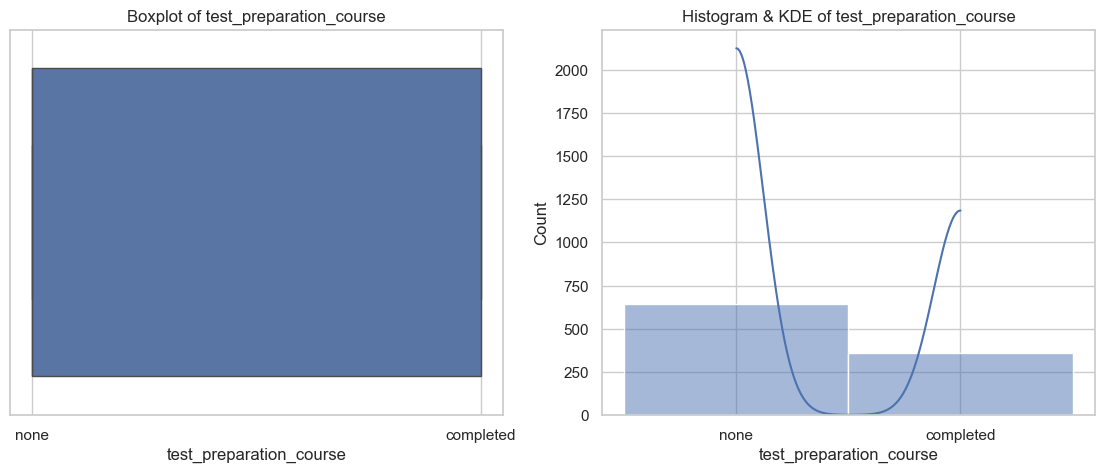

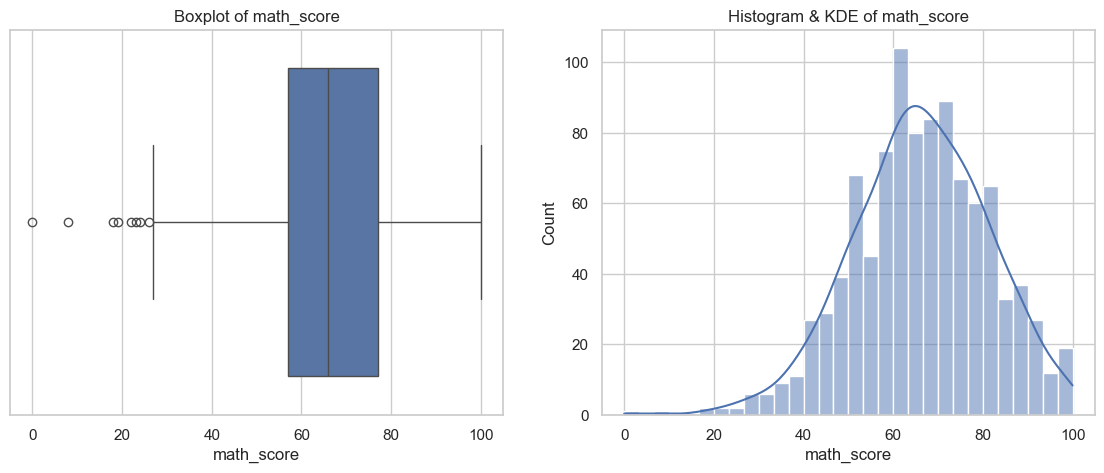

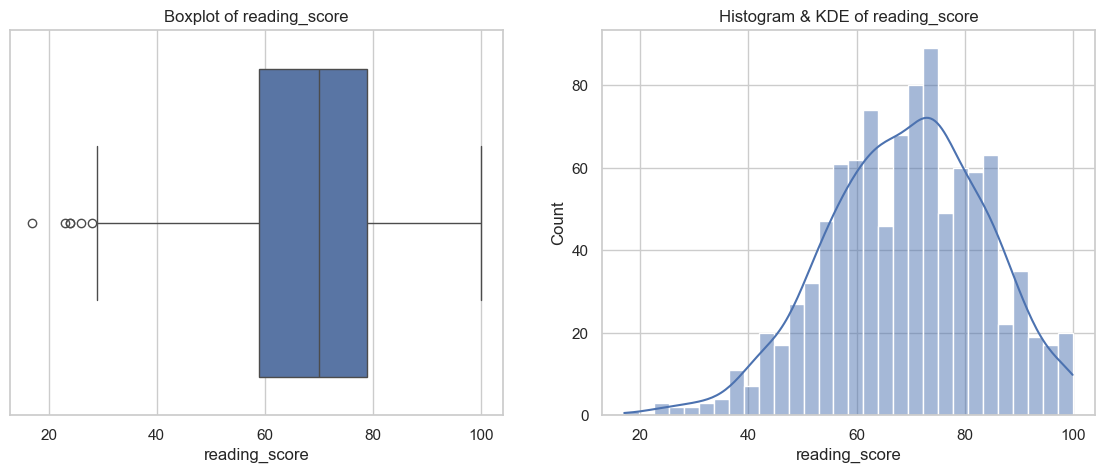

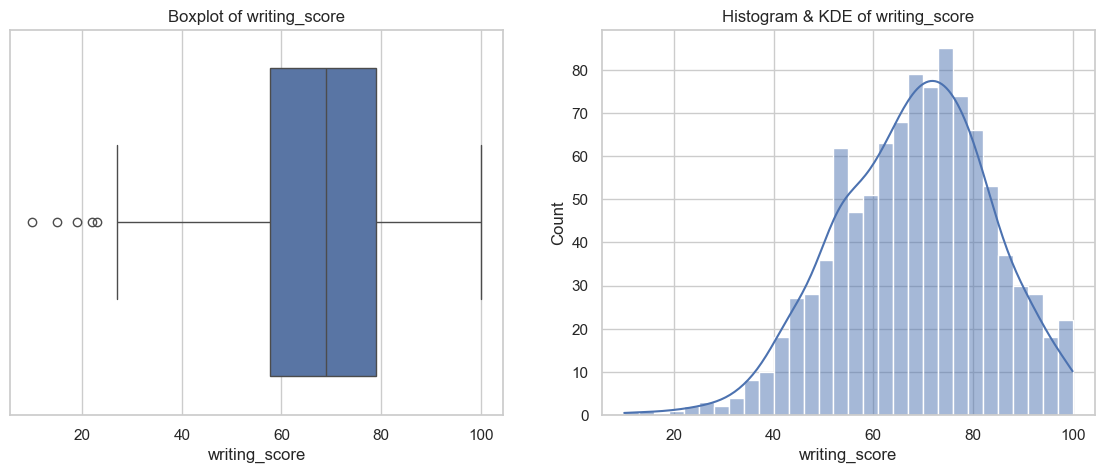

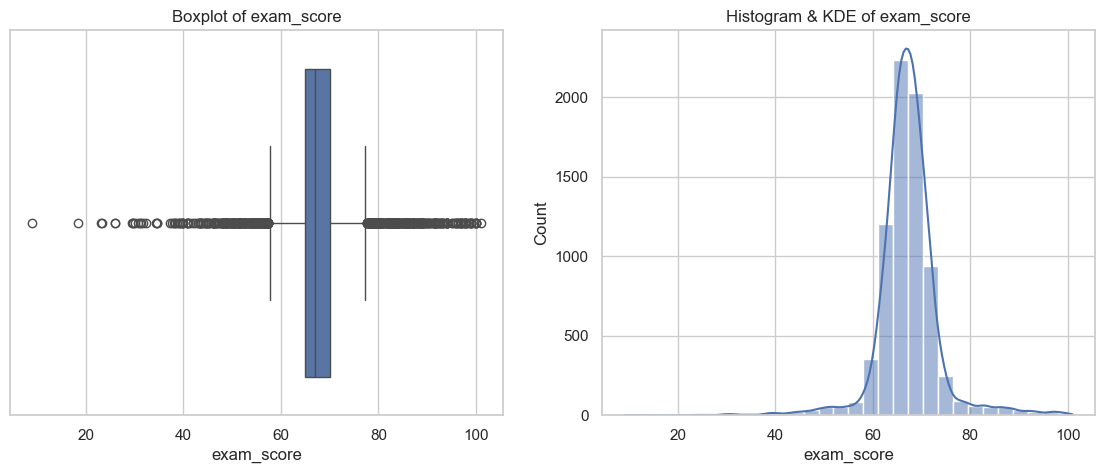

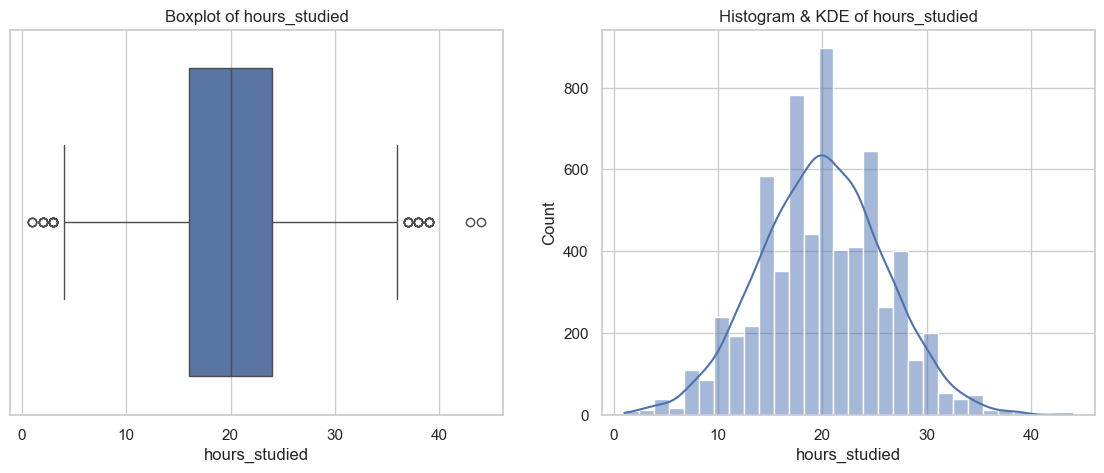

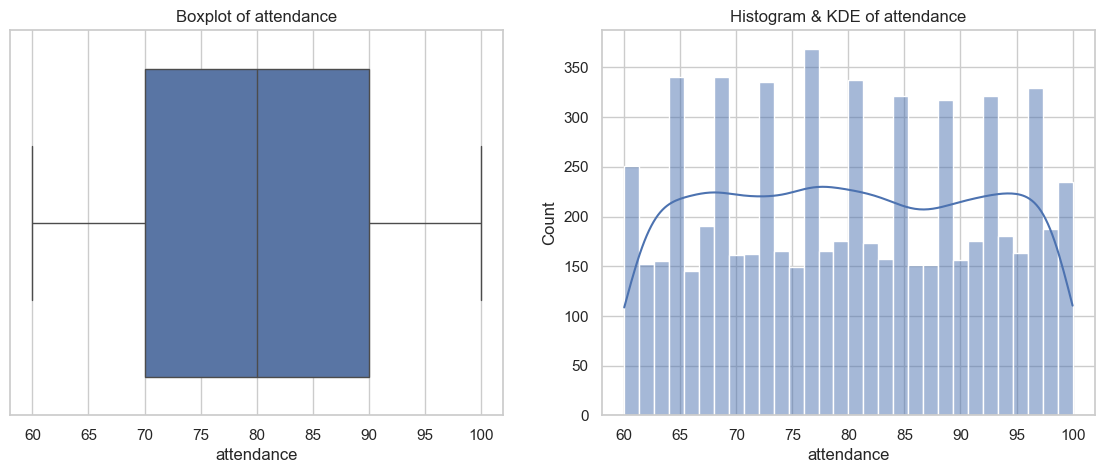

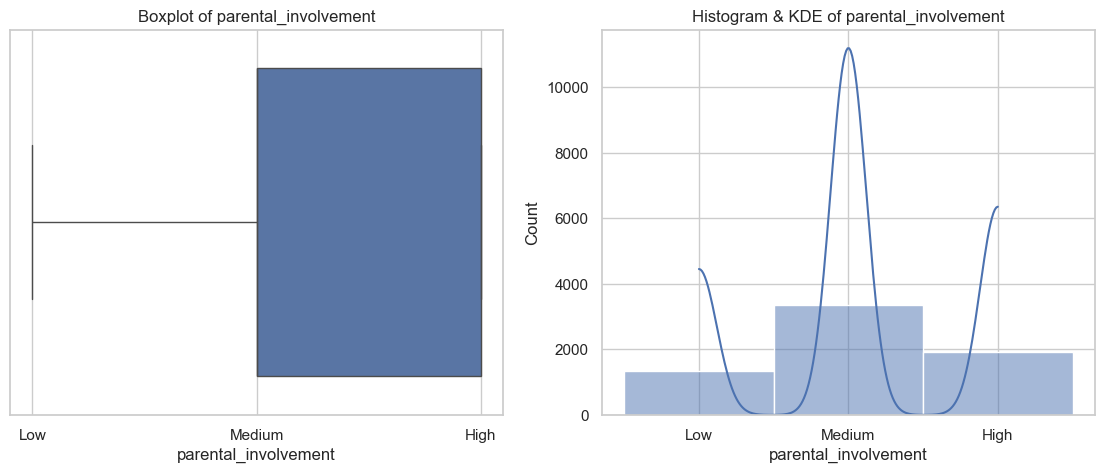

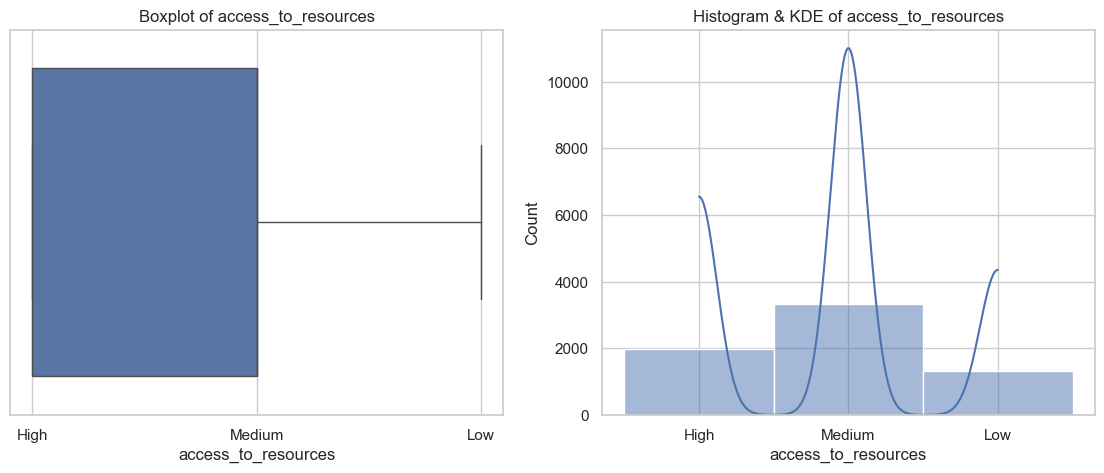

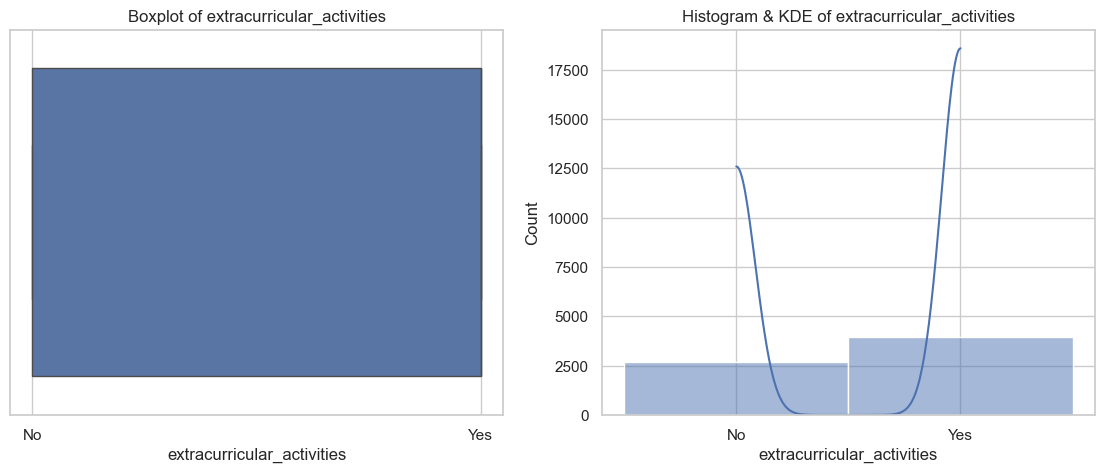

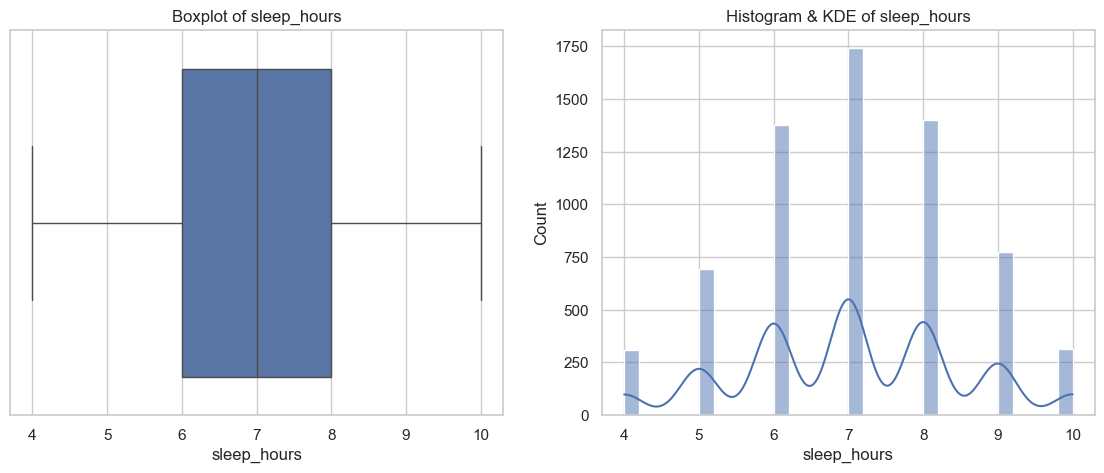

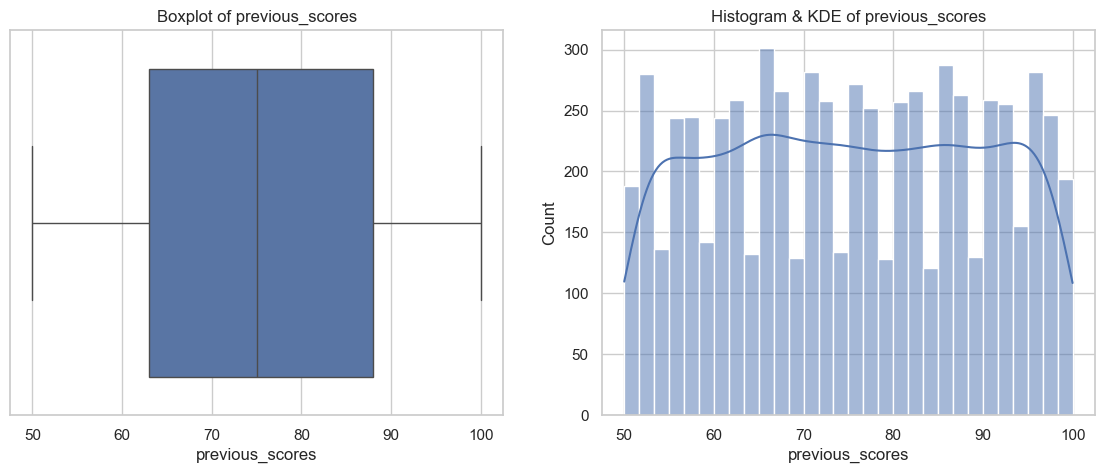

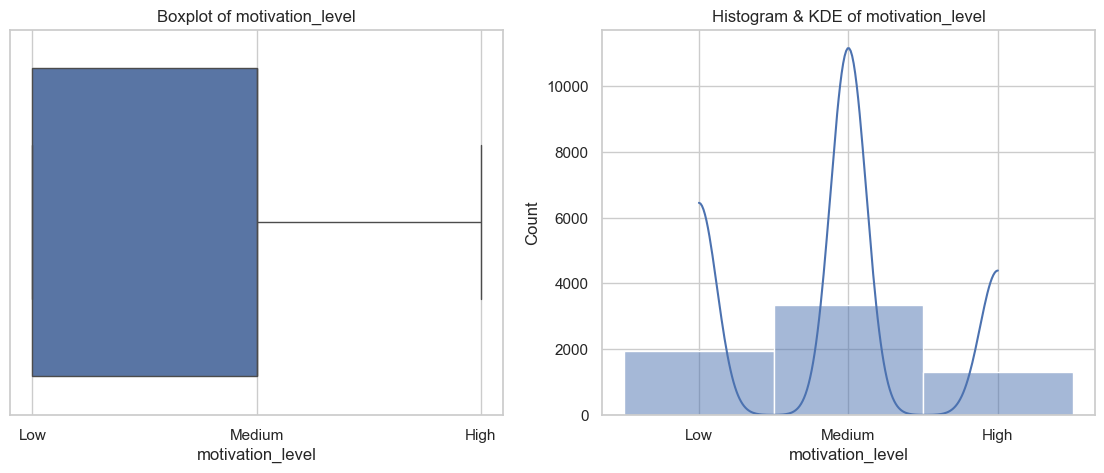

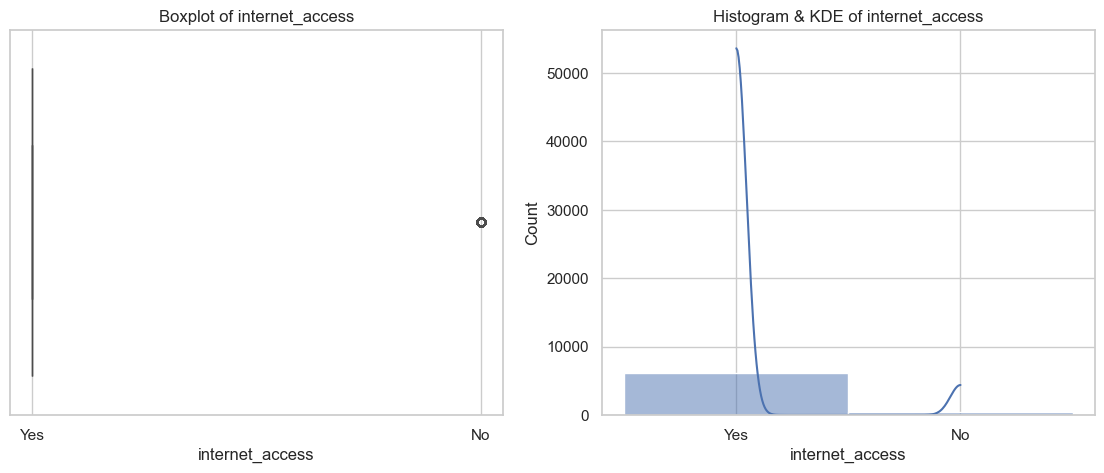

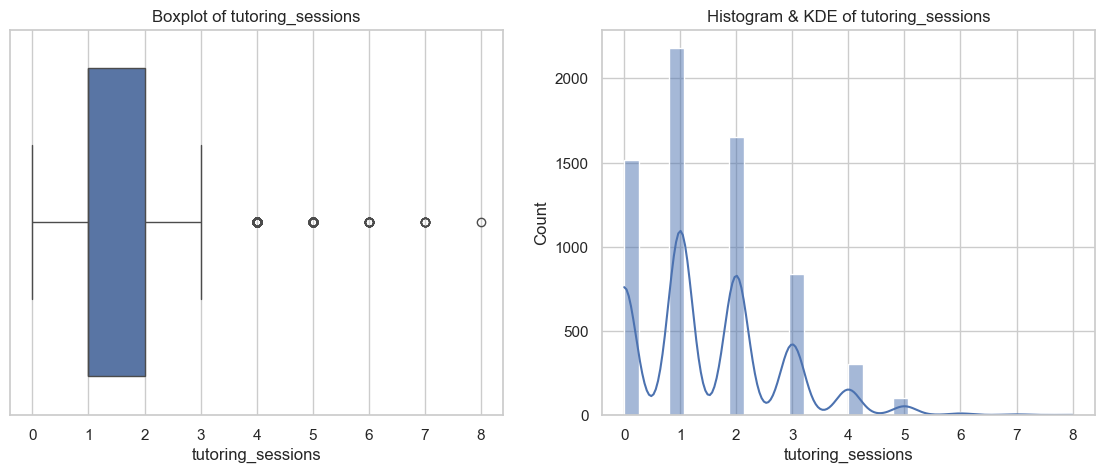

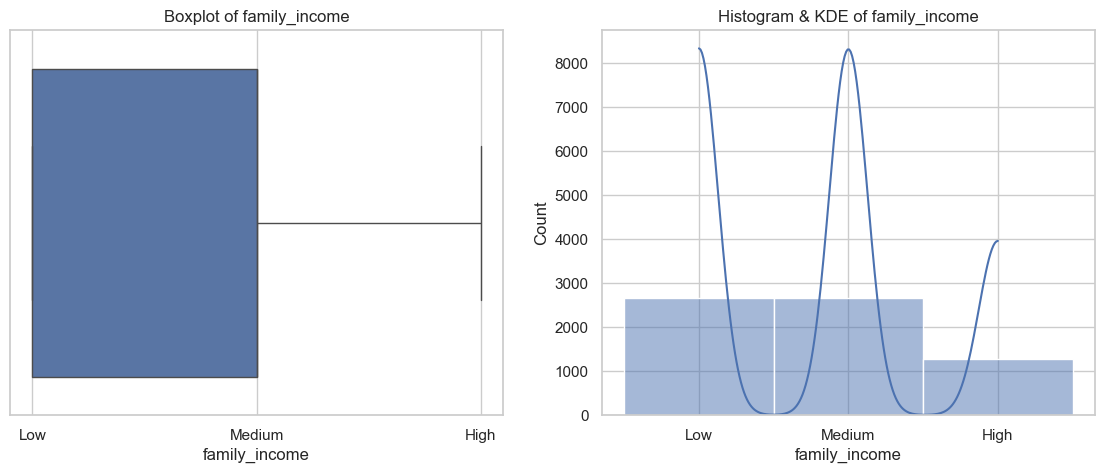

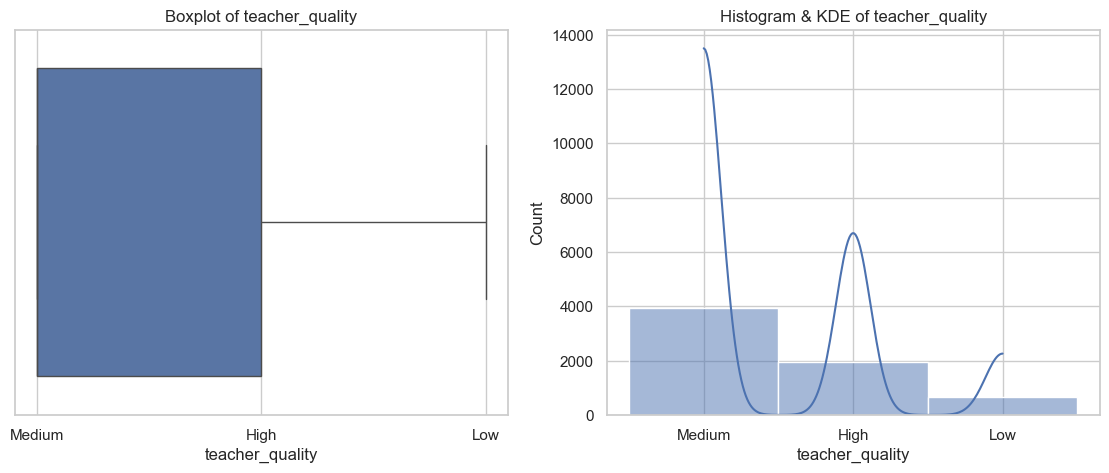

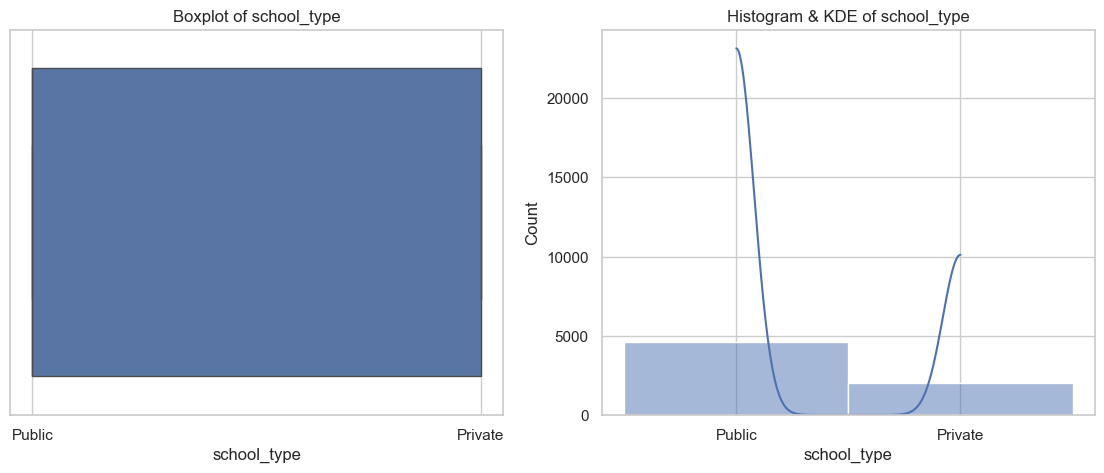

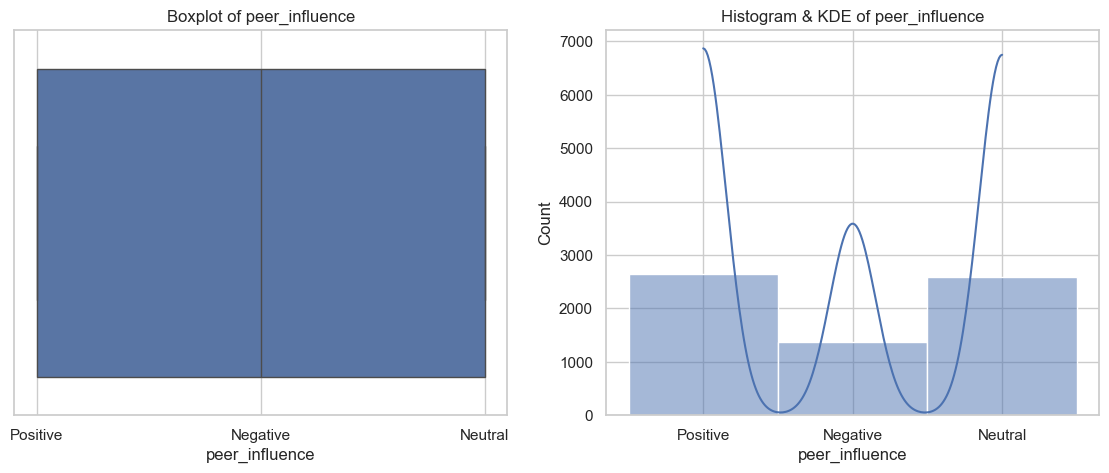

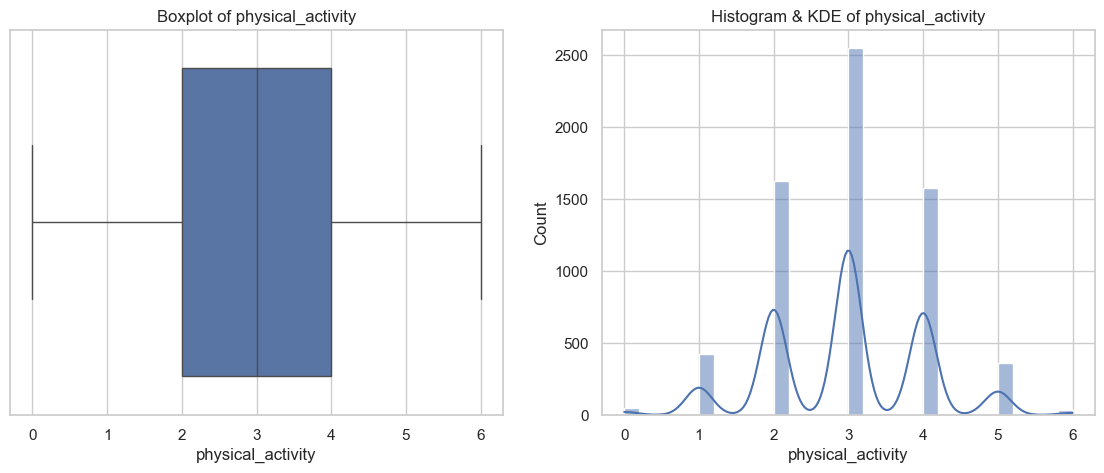

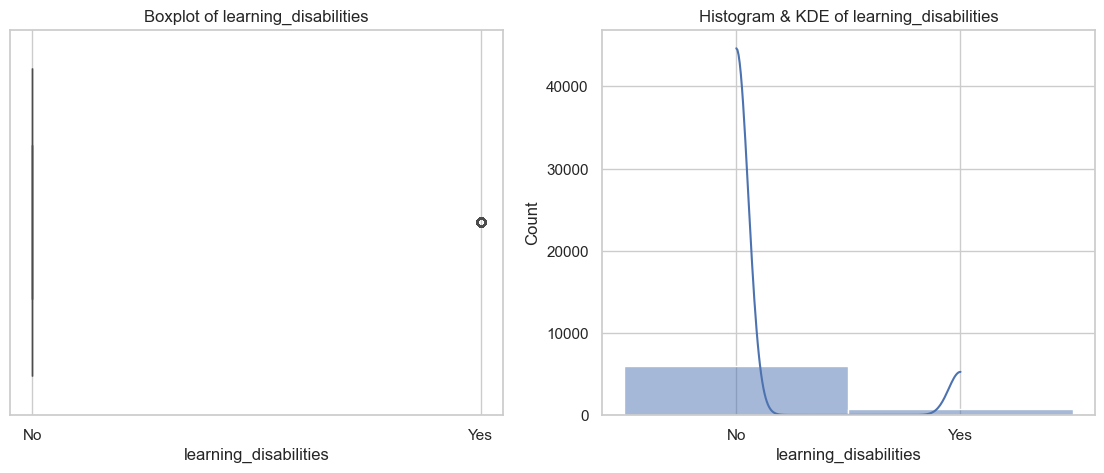

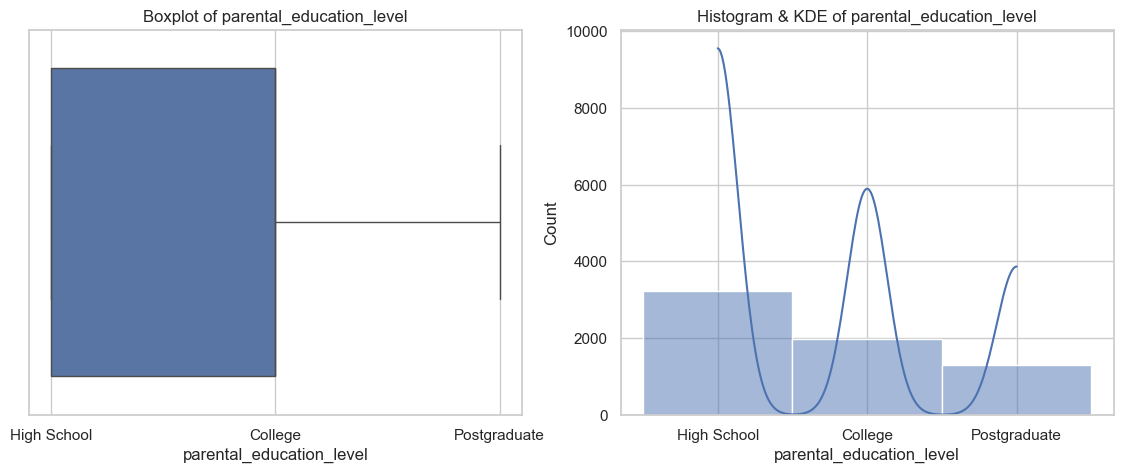

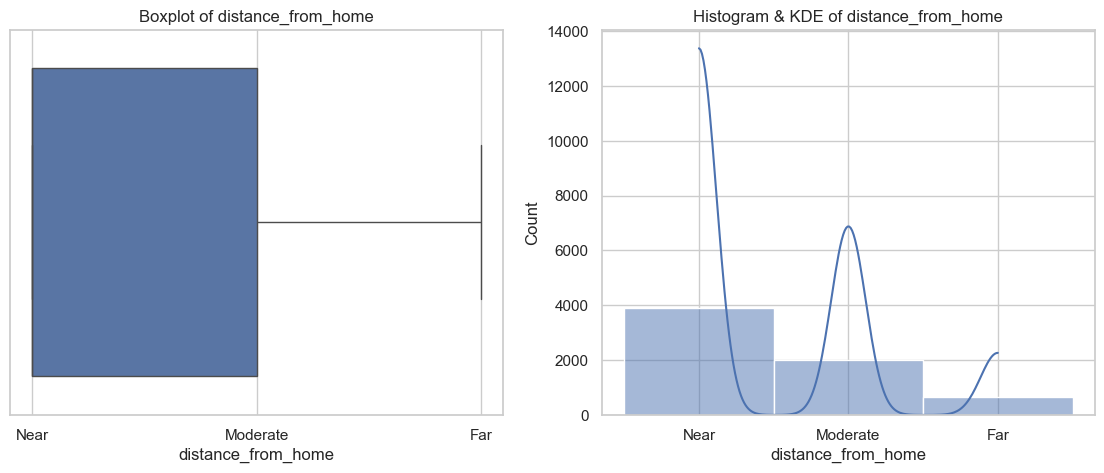

In [10]:
#checking plots for outliers and such
sns.set(style="whitegrid")

# Plot boxplots and bell curves for each numerical feature
for col in combined:
    plt.figure(figsize=(14, 5))
    
    # Boxplot (shows outliers as points beyond whiskers)
    plt.subplot(1, 2, 1)
    sns.boxplot(x=combined[col])
    plt.title(f'Boxplot of {col}')
    
    # Bell curve: histogram + KDE (to check distribution shape)
    plt.subplot(1, 2, 2)
    sns.histplot(combined[col], kde=True, bins=30)
    plt.title(f'Histogram & KDE of {col}')
    
    plt.show()

In [11]:
#using labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in combined.select_dtypes(include='object').columns:
    combined[col] = le.fit_transform(combined[col])

In [12]:
#checking null
combined.isna().sum()

gender                            0
race/ethnicity                    0
parental_level_of_education       0
lunch                             0
test_preparation_course           0
math_score                     6607
reading_score                  6607
writing_score                  6607
exam_score                        0
hours_studied                  1000
attendance                     1000
parental_involvement              0
access_to_resources               0
extracurricular_activities        0
sleep_hours                    1000
previous_scores                1000
motivation_level                  0
internet_access                   0
tutoring_sessions              1000
family_income                     0
teacher_quality                   0
school_type                       0
peer_influence                    0
physical_activity              1000
learning_disabilities             0
parental_education_level          0
distance_from_home                0
dtype: int64

In [13]:
combined

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,exam_score,hours_studied,...,internet_access,tutoring_sessions,family_income,teacher_quality,school_type,peer_influence,physical_activity,learning_disabilities,parental_education_level,distance_from_home
0,2,1,1,1,1,72.0,72.0,74.0,72.666667,NaN,...,2,NaN,3,3,2,3,NaN,2,3,3
1,2,2,4,1,0,69.0,90.0,88.0,82.333333,NaN,...,2,NaN,3,3,2,3,NaN,2,3,3
2,2,1,3,1,1,90.0,95.0,93.0,92.666667,NaN,...,2,NaN,3,3,2,3,NaN,2,3,3
3,3,0,0,0,1,47.0,57.0,44.0,49.333333,NaN,...,2,NaN,3,3,2,3,NaN,2,3,3
4,3,2,4,1,1,76.0,78.0,75.0,76.333333,NaN,...,2,NaN,3,3,2,3,NaN,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7602,0,5,6,2,2,NaN,NaN,NaN,68.000000,25.0,...,1,1.0,0,2,1,2,2.0,0,1,2
7603,0,5,6,2,2,NaN,NaN,NaN,69.000000,23.0,...,1,3.0,1,0,1,2,2.0,0,1,2
7604,0,5,6,2,2,NaN,NaN,NaN,68.000000,20.0,...,1,3.0,1,2,1,0,2.0,0,2,2
7605,0,5,6,2,2,NaN,NaN,NaN,68.000000,10.0,...,1,2.0,1,2,0,2,3.0,0,1,0


In [14]:
#imputing null with median

combined['math_score'] = combined['math_score'].fillna(combined['math_score'].median())
combined['reading_score'] = combined['reading_score'].fillna(combined['reading_score'].median())
combined['writing_score'] = combined['writing_score'].fillna(combined['writing_score'].median())
combined['hours_studied'] = combined['hours_studied'].fillna(combined['hours_studied'].median())
combined['attendance'] = combined['attendance'].fillna(combined['attendance'].median())
combined['sleep_hours'] = combined['sleep_hours'].fillna(combined['sleep_hours'].median())
combined['previous_scores'] = combined['previous_scores'].fillna(combined['previous_scores'].median())
combined['tutoring_sessions'] = combined['tutoring_sessions'].fillna(combined['tutoring_sessions'].median())
combined['physical_activity'] = combined['physical_activity'].fillna(combined['physical_activity'].median())



In [15]:
combined.isna().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
exam_score                     0
hours_studied                  0
attendance                     0
parental_involvement           0
access_to_resources            0
extracurricular_activities     0
sleep_hours                    0
previous_scores                0
motivation_level               0
internet_access                0
tutoring_sessions              0
family_income                  0
teacher_quality                0
school_type                    0
peer_influence                 0
physical_activity              0
learning_disabilities          0
parental_education_level       0
distance_from_home             0
dtype: int64

In [16]:
#using labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in combined.select_dtypes(include='object').columns:
    combined[col] = le.fit_transform(combined[col])

In [17]:
combined

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,exam_score,hours_studied,...,internet_access,tutoring_sessions,family_income,teacher_quality,school_type,peer_influence,physical_activity,learning_disabilities,parental_education_level,distance_from_home
0,2,1,1,1,1,72.0,72.0,74.0,72.666667,20.0,...,2,1.0,3,3,2,3,3.0,2,3,3
1,2,2,4,1,0,69.0,90.0,88.0,82.333333,20.0,...,2,1.0,3,3,2,3,3.0,2,3,3
2,2,1,3,1,1,90.0,95.0,93.0,92.666667,20.0,...,2,1.0,3,3,2,3,3.0,2,3,3
3,3,0,0,0,1,47.0,57.0,44.0,49.333333,20.0,...,2,1.0,3,3,2,3,3.0,2,3,3
4,3,2,4,1,1,76.0,78.0,75.0,76.333333,20.0,...,2,1.0,3,3,2,3,3.0,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7602,0,5,6,2,2,66.0,70.0,69.0,68.000000,25.0,...,1,1.0,0,2,1,2,2.0,0,1,2
7603,0,5,6,2,2,66.0,70.0,69.0,69.000000,23.0,...,1,3.0,1,0,1,2,2.0,0,1,2
7604,0,5,6,2,2,66.0,70.0,69.0,68.000000,20.0,...,1,3.0,1,2,1,0,2.0,0,2,2
7605,0,5,6,2,2,66.0,70.0,69.0,68.000000,10.0,...,1,2.0,1,2,0,2,3.0,0,1,0


In [18]:
#train test split to prevent data leak

from sklearn.model_selection import train_test_split
X=combined.drop('exam_score',axis=1)
y=combined['exam_score']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [19]:
#dataset has a considerable number of outliers especially the target column so using robust scaler

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
#using linear regression

from sklearn.linear_model import LinearRegression

LR=LinearRegression()

LR.fit(X_train,y_train)

y_pred_LR=LR.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2_score_LR=r2_score(y_test,y_pred_LR)
r2_score_LR


0.8677782287854463

In [ ]:
#using random forest
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()

RF.fit(X_train,y_train)

y_pred_RF=RF.predict(X_test)

r2_score_RF = r2_score(y_test,y_pred_RF)
print(f'The R2 Score for ',r2_score_RF)

The R2 Score for  0.8547172296926517


In [ ]:
#using decision tree
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor()

DT.fit(X_train,y_train)

y_pred_DT=DT.predict(X_test)

r2_score_DT=r2_score(y_test,y_pred_DT)
r2_score_DT

0.6389690508902752

In [ ]:
#using XGBoost
import xgboost as xgb

XGB = xgb.XGBRegressor()

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)

r2_score_XGB = r2_score(y_test, y_pred_XGB)

r2_score_XGB

0.8608201096278867

In [ ]:
#using adaboost
from sklearn.ensemble import AdaBoostRegressor
ADA=AdaBoostRegressor()

ADA.fit(X_train, y_train)

y_pred_ADA = ADA.predict(X_test)

r2_score_ADA = r2_score(y_test, y_pred_ADA)

print(f'The R2 Score for AdaBoost Model: {r2_score_ADA}')

The R2 Score for AdaBoost Model: 0.6383196969411356


In [25]:
#making use of grid search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define model and parameter grid
model=RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [25,50,100, 200, 300, 400,500],'max_depth': [None, 10,20,30,40,50]}

#Grid Search Cv
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

#print result
print('Best Parameters:', grid_search.best_params_)
print('R2 Score:', r2_score(y_test, y_pred))


Best Parameters: {'max_depth': 20, 'n_estimators': 500}
R2 Score: 0.8558985311424404


In [26]:
#linear regression gave the best result